___
<center><b><font size = 6>Señales y Sisteamas & Laboratorio 2020~1<\font><\b><\center>
<center><b><font size = 4>Programa de Ingeniería Electrónica, Facultad de Ingeniería y Ciencias Básicas<\font><\b><\center>
<center><b><font size = 3>Fundación Universitaria Loss Libertadores<\font><\b><\center>

___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import convolve as conv

<img src="Figure1.png">

In [22]:
# Función escalón
def step_fcn(ti, tf, t0, N = 1000):
    t = np.linspace(ti, tf, N)
    x = np.zeros_like(t)
    x[t >= t0] = 1.0
    return x
# Función rampa
def rampa(ti, tf, t0, N = 1000):
    t = np.linspace(ti, tf, N)
    x = np.zeros_like(t)
    x[t >= t0] = (t[t >= t0] - t0)
    return x

def pulso_rect(ti, tf, t0, a, N = 1000): #rect(t/a)
    t = np.linspace(ti, tf, N)
    x = np.zeros_like(t)
    x[np.abs(t - t0) <= a] = 1.0
    return x

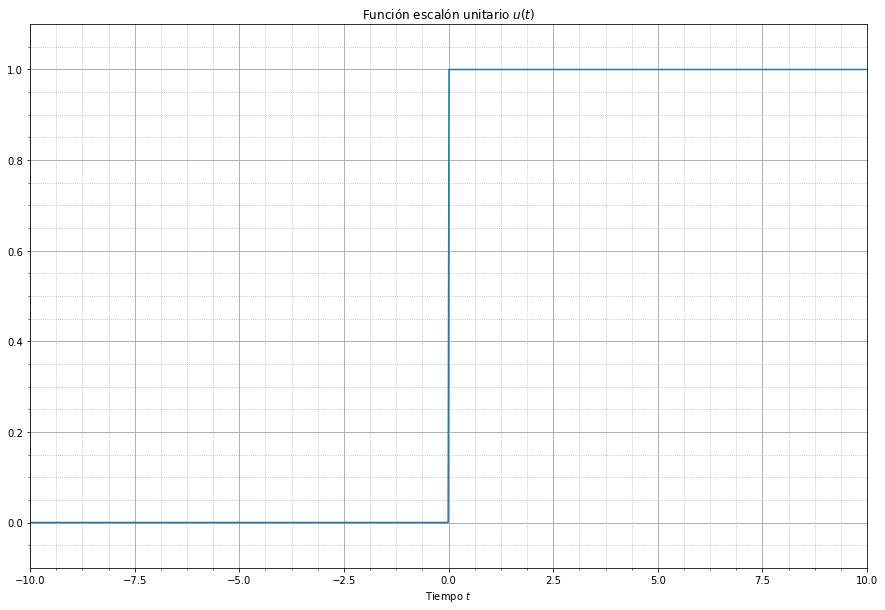

In [9]:
ti = -10
tf = 10
t0 = 0
N = 1000
#
t = np.linspace(ti, tf, N)
x = step_fcn(ti, tf, t0)
#
fig, ax = plt.subplots()
fig.set_size_inches((15, 10))
#
ax.plot(t, x)
ax.set_xlabel('Tiempo $t$')
ax.set_title('Función escalón unitario $u(t)$')
ax.minorticks_on()
ax.grid(b = True, which = 'minor', linestyle = ':')
ax.grid(b = True, which = 'major', linewidth = 1)
ax.axis([ti, tf, -0.1, 1.1*max(x)])
plt.show()

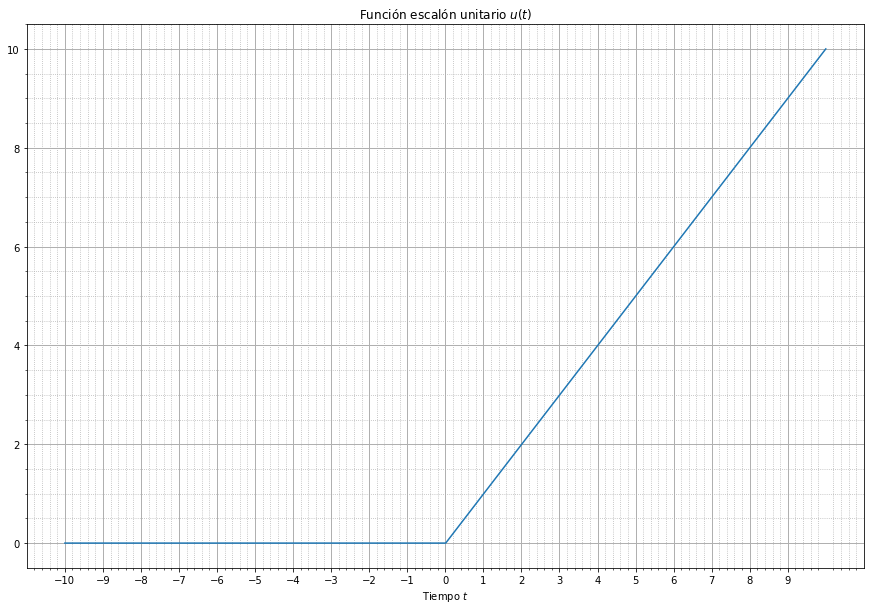

In [18]:
# Convolución -- Parte 1
y = conv(x, x, mode = 'same')
y = tf * (y / max(y))
#
fig, ax = plt.subplots()
fig.set_size_inches((15, 10))
#
ax.plot(t, y)
ax.set_xlabel('Tiempo $t$')
ax.set_title('Función escalón unitario $u(t)$')
ax.minorticks_on()
ax.grid(b = True, which = 'minor', linestyle = ':')
ax.grid(b = True, which = 'major', linewidth = 1)
ax.set_xticks(np.arange(ti, tf, step = 1.0))
#ax.axis([ti, tf, -0.1, 1.1*max(x)])
plt.show()

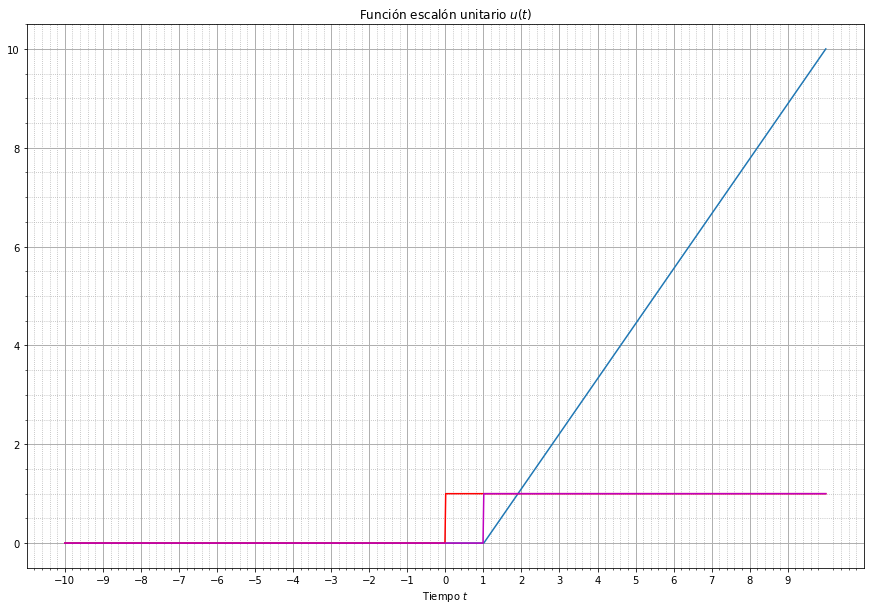

In [20]:
# Convolución -- Parte 1
ti = -10
tf = 10
t0 = 0
N = 1000
#
t = np.linspace(ti, tf, N)
x1 = step_fcn(ti, tf, 0)
x2 = step_fcn(ti, tf, 1)
y = conv(x1, x2, mode = 'same')
y = tf * (y / max(y))
#
fig, ax = plt.subplots()
fig.set_size_inches((15, 10))
#
ax.plot(t, y)
ax.plot(t, x1, 'r')
ax.plot(t, x2, 'm')
ax.set_xlabel('Tiempo $t$')
ax.set_title('Función escalón unitario $u(t)$')
ax.minorticks_on()
ax.grid(b = True, which = 'minor', linestyle = ':')
ax.grid(b = True, which = 'major', linewidth = 1)
ax.set_xticks(np.arange(ti, tf, step = 1.0))
#ax.axis([ti, tf, -0.1, 1.1*max(x)])
plt.show()

<img src="Figure2.png">

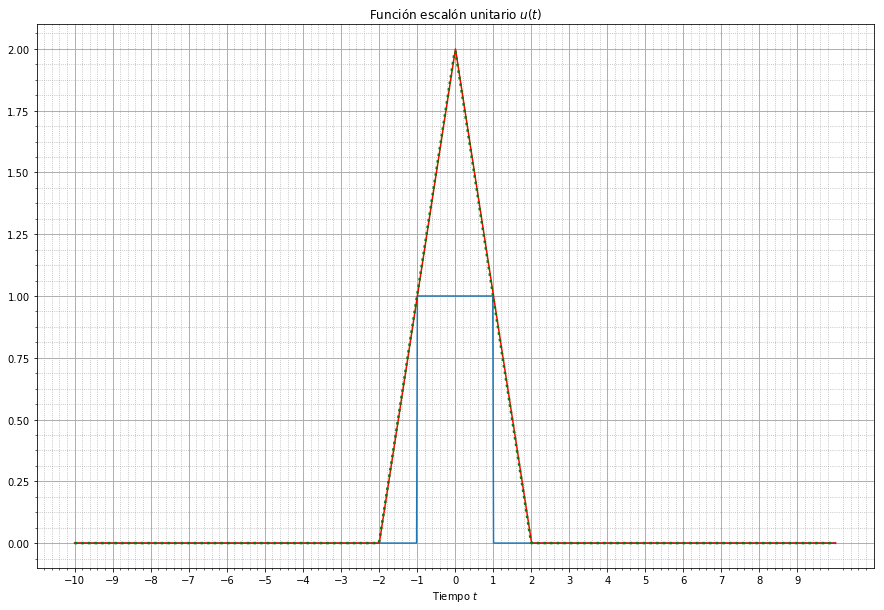

In [33]:
ti = -10
tf = 10
t0 = 0
N = 1000
#
t = np.linspace(ti, tf, N)
x = pulso_rect(ti, tf, t0, 1)
y = conv(x, x, mode = 'same')
y = 2 * (y / max(y))
#
tri = rampa(ti, tf, -2) - 2 * rampa(ti, tf, 0) + rampa(ti, tf, 2)
#
fig, ax = plt.subplots()
fig.set_size_inches((15, 10))
#
ax.plot(t, x)
ax.plot(t, y, 'r')
ax.plot(t, tri, 'g:', linewidth = 2.5)
ax.set_xlabel('Tiempo $t$')
ax.set_title('Función escalón unitario $u(t)$')
ax.minorticks_on()
ax.grid(b = True, which = 'minor', linestyle = ':')
ax.grid(b = True, which = 'major', linewidth = 1)
ax.set_xticks(np.arange(ti, tf, step = 1.0))
#ax.axis([ti, tf, -0.1, 1.1*max(x)])
plt.show()

<img src="Figure3.png">

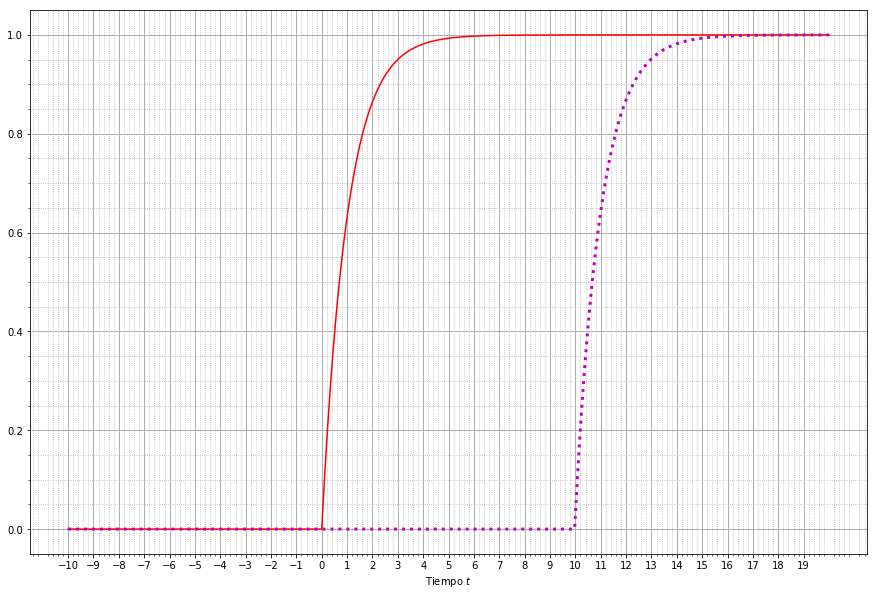

In [55]:
# Respuesta (vía convolución) de un sistema de primer orden
ti = -10
tf = 20
N = 1000
#
t = np.linspace(ti, tf, N)
R = 1
C = 1
a = 1 / (R * C)
x = step_fcn(ti, tf, 0)
u = step_fcn(ti, tf, 0)
h = a * np.exp(-a * t) * u
y = conv(x, h)#, mode = 'same')
ya = (1 - np.exp(-a*t)) * u
y = y / max(y)
#
fig, ax = plt.subplots()
fig.set_size_inches((15, 10))
#
#ax.plot(t, h)
#ax.plot(t, x, 'r')
ax.plot(t, ya, 'r')
ax.plot(t, y[0:1000], 'm:', linewidth = 3)
ax.set_xlabel('Tiempo $t$')
#ax.set_title('Función escalón unitario $u(t)$')
ax.minorticks_on()
ax.grid(b = True, which = 'minor', linestyle = ':')
ax.grid(b = True, which = 'major', linewidth = 1)
ax.set_xticks(np.arange(ti, tf, step = 1.0))
#ax.axis([ti, tf, -0.1, 1.1*max(x)])
plt.show()